<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-the-dataset" data-toc-modified-id="Read-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Read the dataset</strong></a></span></li><li><span><a href="#Split-data-into-training-and-test-datasets." data-toc-modified-id="Split-data-into-training-and-test-datasets.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Split data into training and test datasets.</strong></a></span></li><li><span><a href="#Text-Vectorization" data-toc-modified-id="Text-Vectorization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Text Vectorization</strong></a></span><ul class="toc-item"><li><span><a href="#Create-a-switcher-function-to-call-for-different-estimators-to-test" data-toc-modified-id="Create-a-switcher-function-to-call-for-different-estimators-to-test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create a switcher function to call for different estimators to test</a></span></li><li><span><a href="#Create-a-pipeline-to-grid-search-hyperparameters-for-CountVectorizer-and-TF-IDF-vectorizer" data-toc-modified-id="Create-a-pipeline-to-grid-search-hyperparameters-for-CountVectorizer-and-TF-IDF-vectorizer-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create a pipeline to grid search hyperparameters for CountVectorizer and TF-IDF vectorizer</a></span></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Machine Learning</strong></a></span><ul class="toc-item"><li><span><a href="#Gridsearch-Logistic-Regression-Classifier" data-toc-modified-id="Gridsearch-Logistic-Regression-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gridsearch Logistic Regression Classifier</a></span></li><li><span><a href="#Gridsearch-Multinomial-Naive-Bayes-Classifier" data-toc-modified-id="Gridsearch-Multinomial-Naive-Bayes-Classifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gridsearch Multinomial Naive Bayes Classifier</a></span></li><li><span><a href="#Gridsearch-Random-Forest-Classifier" data-toc-modified-id="Gridsearch-Random-Forest-Classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gridsearch Random Forest Classifier</a></span></li><li><span><a href="#Gridsearch-XGBoost-Classifier" data-toc-modified-id="Gridsearch-XGBoost-Classifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Gridsearch XGBoost Classifier</a></span></li><li><span><a href="#Display-summary-of-grid-search-for-all-the-models" data-toc-modified-id="Display-summary-of-grid-search-for-all-the-models-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Display summary of grid search for all the models</a></span></li><li><span><a href="#Plot-ROC-curve-for-Random-Forest-Classifier" data-toc-modified-id="Plot-ROC-curve-for-Random-Forest-Classifier-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Plot ROC curve for Random Forest Classifier</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li><li><span><a href="#Adjust-Threshold-as-per-business-usecase" data-toc-modified-id="Adjust-Threshold-as-per-business-usecase-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Adjust Threshold as per business usecase</strong></a></span><ul class="toc-item"><li><span><a href="#Find-optimal-value-Beta" data-toc-modified-id="Find-optimal-value-Beta-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Find optimal value Beta</a></span></li><li><span><a href="#Plot-confusion-matrix-with-adjusted-threshold-and-beta" data-toc-modified-id="Plot-confusion-matrix-with-adjusted-threshold-and-beta-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot confusion matrix with adjusted threshold and beta</a></span></li><li><span><a href="#Plot-metrics-against-Threshold" data-toc-modified-id="Plot-metrics-against-Threshold-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plot metrics against Threshold</a></span></li></ul></li><li><span><a href="#Analysis-of-misclassified-comments" data-toc-modified-id="Analysis-of-misclassified-comments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Analysis of misclassified comments</strong></a></span><ul class="toc-item"><li><span><a href="#False-negatives-(miscalssified-as-Ham)" data-toc-modified-id="False-negatives-(miscalssified-as-Ham)-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>False-negatives (miscalssified as Ham)</a></span></li><li><span><a href="#False-positives-(miscalssified-as-Spam)" data-toc-modified-id="False-positives-(miscalssified-as-Spam)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>False-positives (miscalssified as Spam)</a></span></li></ul></li></ul></div>

In [29]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(15,5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)

import nltk
from scipy import stats
import re
from  scipy.stats import ttest_ind
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve,fbeta_score,make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from cf_matrix import make_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator,TransformerMixin

import Helper,cf_matrix
import importlib
importlib.reload(Helper);
importlib.reload(cf_matrix);
import joblib
from tqdm import tqdm

### **Read the dataset**
Read the dataset saved after preprocessing the comments. Original comments were proprocessed to make it easier for machine learning model to be able to seperate signal from noise.


In [2]:
data=pd.read_csv('Data/cleanedData.csv',dtype=str)
data.dropna(subset=['CleanWordList'],inplace=True)
data.head(3)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,%OfUpperCaseLetters,NoOfURL,AvgLengthOfEachWord,%OfNoOfStopWords,NoOfWords,%OfNoOfUniqueWords,AvgSentenceLength,TextStandard,CleanWordList
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: kobyoshi02",1,1.79,0,6.12,32.14,13,1.0,8.0,3.0,huh anyway check tube channel kobyoshi99
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,"Hey guys check out my new channel and our first vid THIS IS US THE MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment and please subscribe!!!!",1,12.05,0,4.22,26.51,40,0.775,15.0,6.0,hey guy check new channel first vid u monkey 'm monkey white shirt please leave like comment please subscribe
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,2.63,0,3.88,42.11,8,1.0,8.0,4.0,test say murdev.com


In [3]:
data.fillna(0,inplace=True)

### **Split data into training and test datasets.**
I will use the training part to further split into training and validation part to perform cross validation. Once a good model is selected, I will test it's performance on unseen data (test dataset).

In [4]:
data[['%OfUpperCaseLetters', 'NoOfURL', 'AvgLengthOfEachWord',
       '%OfNoOfStopWords', 'NoOfWords', '%OfNoOfUniqueWords',
       'AvgSentenceLength', 'TextStandard']]=data[['%OfUpperCaseLetters', 'NoOfURL', 'AvgLengthOfEachWord',
       '%OfNoOfStopWords', 'NoOfWords', '%OfNoOfUniqueWords',
       'AvgSentenceLength', 'TextStandard']].astype(float)

In [5]:
# Meta features
cols=['COMMENT_ID','%OfUpperCaseLetters', 'NoOfURL', 'AvgLengthOfEachWord',
       '%OfNoOfStopWords', 'NoOfWords', '%OfNoOfUniqueWords',
       'AvgSentenceLength', 'TextStandard', 'CleanWordList']

X=data.loc[:,cols]
y=data['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,stratify=y,random_state=147)

print(' Shape of datasets \n X_train, X_test, y_train, y_test: ',X_train.shape, X_test.shape, y_train.shape, y_test.shape)

 Shape of datasets 
 X_train, X_test, y_train, y_test:  (1328, 10) (570, 10) (1328,) (570,)


### **Text Vectorization**

Compare CountVectorizer() and TfidfVectorizer() by passing the document-term-matrix from the two vectorizers through MultinomialNB(). I used roc_auc metric to select the best model.

#### Create a switcher function to call for different estimators to test

Reference: https://stackoverflow.com/questions/50285973/pipeline-multiple-classifiers

In [6]:
class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator=LogisticRegression(),):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        Default estimator: LogisticRegression()
        """ 
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

In [7]:
class Transfomer(BaseEstimator, TransformerMixin):
    
    def __init__(self,vectorizer=CountVectorizer()):
        self.vectorizer=vectorizer
        self.X=X

    def fit(self, X, y=None):
        """
        Learn how to transform data based on input data, X.
        """
        return self.vectorizer.fit(X)

    def transform(self, X):
        """
        Transform X into a new dataset, Xprime and return it.
        """
        return self.vectorizer.transform(X).toarray()

#### Create a pipeline to grid search hyperparameters for CountVectorizer and TF-IDF vectorizer

In [8]:
pipe_CompareVectorizer= Pipeline([('vectorizer',Transfomer()),
                                  ('clf', ClfSwitcher())
                                ])
paramGrid_CompareVectorizer=[{
                            'vectorizer__vectorizer':[TfidfVectorizer()],
                            'vectorizer__vectorizer__min_df':[0.1,0.01,0.001,0.0001],
                            'vectorizer__vectorizer__ngram_range':[(1,2),(1,3)],
                            'clf__estimator':[LogisticRegression()]
                              },
                              {
                            'vectorizer__vectorizer':[CountVectorizer()],
                            'vectorizer__vectorizer__min_df':[0.1,0.01,0.001,0.0001],
                            'vectorizer__vectorizer__ngram_range':[(1,2),(1,3)],
                            'clf__estimator':[LogisticRegression()]
                              }]

cv = KFold(n_splits=5, random_state=142, shuffle=True)

# Gridsearch with count vectorizer and TFIDF
gs_CompareVectorizer = GridSearchCV(pipe_CompareVectorizer, param_grid=paramGrid_CompareVectorizer,
                                    n_jobs=-1,cv=cv, verbose=0,return_train_score=True,
                                    scoring='roc_auc')

gs_CompareVectorizer.fit(X_train['CleanWordList'],y_train);

# Save the selected vectorizer in a variable to be used later in the process flow
bestVectorizer=gs_CompareVectorizer.best_params_['vectorizer__vectorizer']

print(' Best vectorizer selected: \n',gs_CompareVectorizer.best_params_['vectorizer__vectorizer'])

 Best vectorizer selected: 
 CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.001,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


It is interesting to find that CountVectorizer outperformed TF-IDF. The selected value for min_df is 0.001, i.e 0.1%, and ngram_range=(1,2).

### **Machine Learning**

Using vectorizer selected above, create pipeline, and perform grid search to find best estimator and best parameters.
I decided to try 4 model and perform hyperparameter tuning on them and then selected the best performing model.
I used ROC_AUC to select the best performing model.



#### Gridsearch Logistic Regression Classifier

In [9]:
classifier=LogisticRegression()
param_grid={'clf__C':(0.1,0.5,1,1.5,2,20,50,100,500)}
n_splits=5

helper=Helper.GridSearcher(n_splits, vectorizer=bestVectorizer, clf=classifier, param_grid=param_grid)
gridSearcher_lr=helper.fit(X_train,y_train)

print(' Logistic Regression: \n\n Best Parameters:', gridSearcher_lr.best_params,'\n Best Score:', gridSearcher_lr.best_score)

 Logistic Regression: 

 Best Parameters: {'clf__C': 2} 
 Best Score: 0.9809795316254805


 #### Gridsearch Multinomial Naive Bayes Classifier

In [10]:
classifier=MultinomialNB()
param_grid={'clf__alpha':(0,0.1,0.5,1,2,20,100),
            'clf__fit_prior':(True,False)}

helper=Helper.GridSearcher(n_splits, vectorizer=bestVectorizer, clf=classifier, param_grid=param_grid)
gridSearcher_mn=helper.fit(X_train,y_train)

print(' Multinomial Naive Bayes: \n\n Best Parameters:', gridSearcher_mn.best_params,'\n Best Score:', gridSearcher_mn.best_score)

 Multinomial Naive Bayes: 

 Best Parameters: {'clf__fit_prior': False, 'clf__alpha': 0} 
 Best Score: 0.9308715233787105


#### Gridsearch Random Forest Classifier

In [11]:
classifier=RandomForestClassifier()
param_grid={'clf__n_estimators':(10,100,1000),
            'clf__max_depth':(2,10)}

helper=Helper.GridSearcher(n_splits, vectorizer=bestVectorizer, clf=classifier, param_grid=param_grid)
gridSearcher_rf=helper.fit(X_train,y_train)

print(' Random Forest: \n\n Best Parameters:', gridSearcher_rf.best_params,'\n Best Score:', gridSearcher_rf.best_score)

 Random Forest: 

 Best Parameters: {'clf__n_estimators': 1000, 'clf__max_depth': 10} 
 Best Score: 0.9770370013339905


#### Gridsearch XGBoost Classifier

In [12]:
classifier=XGBClassifier()
# param_grid={'clf__n_estimators':(10,50,100,500,1000),
#             'clf__max_depth':(2,5,10,50,100,500,1000)}

param_grid={'clf__n_estimators':(3,4),
            'clf__max_depth':(2,5)}

helper=Helper.GridSearcher(n_splits, vectorizer=bestVectorizer, clf=classifier, param_grid=param_grid)
gridSearcher_xgb=helper.fit(X_train,y_train)

print(' XGBoost Classifier: \n\n Best Parameters:', gridSearcher_xgb.best_params,'\n Best Score:', gridSearcher_xgb.best_score)

 XGBoost Classifier: 

 Best Parameters: {'clf__n_estimators': 4, 'clf__max_depth': 5} 
 Best Score: 0.9296342372654806


#### Display summary of grid search for all the models

In [13]:
compareEstimator_df=pd.DataFrame(
    data={'Logistic Regression':[gridSearcher_lr.best_params,gridSearcher_lr.best_score],
          'Multinomial Naive Bayes':[gridSearcher_mn.best_params,gridSearcher_mn.best_score],
          'Random Forest':[gridSearcher_rf.best_params,gridSearcher_rf.best_score],
          'XGBoost':[gridSearcher_xgb.best_params,gridSearcher_xgb.best_score]},
    index=['Best Params','Best ROC_AUC Score']).transpose()

compareEstimator_df.sort_values(by='Best ROC_AUC Score',ascending=False,inplace=True)

compareEstimator_df.style.highlight_max(axis=0,subset=['Best ROC_AUC Score'])

,Best Params,Best ROC_AUC Score
Logistic Regression,{'clf__C': 2},0.98098
Random Forest,"{'clf__n_estimators': 1000, 'clf__max_depth': 10}",0.977037
Multinomial Naive Bayes,"{'clf__fit_prior': False, 'clf__alpha': 0}",0.930872
XGBoost,"{'clf__n_estimators': 4, 'clf__max_depth': 5}",0.929634


Logistic Regression Classifier has the highest ROC_AUC.

In [14]:
# Save Logistic Regression classifier in a variable to access it late
fittedWinnerModel=gridSearcher_lr.fittedWinnerModel

#### Plot ROC curve for Random Forest Classifier

ROC curve represents the ratio of true-positive rate against false-positive rate for a range of threshold. The true-positive rate is the proportion of all spam records correctly classified as spam. Similarly, the false-positive rate is the proportion of ham records incorrectly classified as spam.

* *As a rule of thumb, the more the curve is closer to the top-left corner better the performance of the model.*


I have created a helper file which I have used to keep my code separate from analysis space.
I have created a Thresholder class which has plotRocCurve method to plot roc curve for the required model and input data.

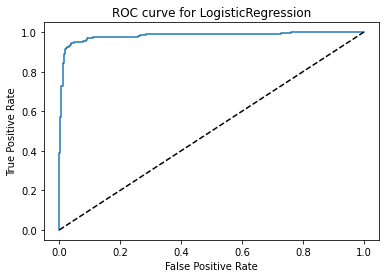

In [15]:
helper=Helper.Thresholder(fittedWinnerModel,X_test,y_test.astype(int),plotROCCurve=True)
helper.fit();

#### Confusion Matrix

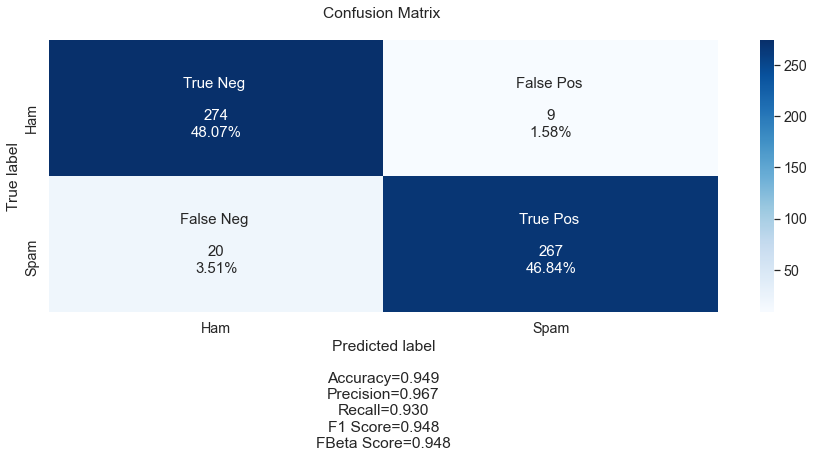

In [16]:
import cf_matrix
# Reference: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

labels = ['True Neg \n','False Pos \n','False Neg \n','True Pos \n']

cm=confusion_matrix(y_test,fittedWinnerModel.predict(X_test))

cf_matrix.make_confusion_matrix(cm,figsize=(15,5),categories=['Ham','Spam'],
                                title='Confusion Matrix \n',group_names=labels)

### **Adjust Threshold as per business usecase**

The default threshold for the model is 0.5, i.e any document having predict_proba <0.5 is classified as Ham and Spam otherwise.  Using 0.5 as threshold, the current model has 1.68% False Positive,i.e. 1.68% of total comments were misclassified as Spam when actually they were non-spam comments. Whereas, 5.45% of total comments are classified as Ham when they were actually spam. 


Precision is a good measure to determine when the costs of False Positives are high. It is more important for me to not flag a Ham comment as Spam than flagging every spam comment as spam. Hence, I am trying to achieve better precision than recall. I used the FBeta score as it allows to adjust the value of beta to give more weight to precision or recall. Beta < 1 gives more weight to precision, while beta > 1 favors recall.


I chose a number of values less than 1 to set as β and searched for the optimal threshold that maximizes Fbeta score.

#### Find optimal value Beta

I have created calculateMetrics method in Thresholder class to help find optimal threshold. 
This method searches for 1000 thresholds between 0 and 1 to find a beta where Fbeta Score is highest.

In [17]:
metrics_df=pd.DataFrame(columns=['Threshold','Precision','Recall','F1','FBeta','Accuracy','Beta'])
helper=Helper.Thresholder(gs=fittedWinnerModel,
                          X=X_train,
                          y=y_train)

helper.fit(beta=0.5);

In [18]:
metric_df=helper.metric_df

metric_df.sort_values(by='FBeta',ascending=False,inplace=True)
metric_df.reset_index(drop=True,inplace=True)

metric_df.head().style.highlight_max(axis=0,subset=['FBeta'])

,Threshold,Precision,Recall,F1,FBeta,Accuracy,Beta
0,0.543306,1,0.980712,0.990262,0.996082,0.990211,0.5
1,0.475235,0.998487,0.986547,0.992481,0.996076,0.99247,0.5
2,0.544519,1,0.979259,0.989521,0.995782,0.989458,0.5
3,0.486523,0.998487,0.985075,0.991736,0.995775,0.991717,0.5
4,0.550045,1,0.977811,0.988781,0.995482,0.988705,0.5


In [19]:
bestThreshold=metric_df['Threshold'].iloc[0]

print('Best FBeta Score is threshold={}.'
      .format(bestThreshold))

Best FBeta Score is threshold=0.5433058860675448.


#### Plot confusion matrix with adjusted threshold and beta

In [20]:
def adjustThreshold(predict_proba,threshold):
    predict_newThreshold=[]
    for prob in predict_proba:
        if prob<threshold:
            predict_newThreshold.append(0)
        else:   
            predict_newThreshold.append(1)
    return predict_newThreshold

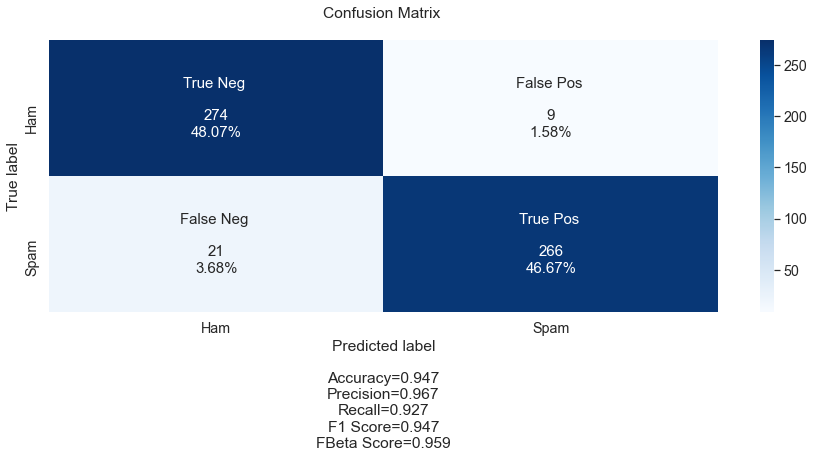

In [21]:
predict_proba=fittedWinnerModel.predict_proba(X_test)[:,1]


cm=confusion_matrix(y_test.astype(int),adjustThreshold(predict_proba,threshold=bestThreshold))
cf_matrix.make_confusion_matrix(cm,figsize=(15,5),categories=['Ham','Spam'],
                                title='Confusion Matrix \n',group_names=labels,beta=0.5)

Adjusting the threshold to **0.643863** from default of 0.5 reduced the false-positives by 0.34%.

#### Plot metrics against Threshold

In [ ]:
helper=Helper.Thresholder(gs=fittedWinnerModel,
                          X=X_train,
                          y=y_train, plotOptimalThreshold=True)

helper.fit(beta=0.5);

###  **Analysis of misclassified comments**

In [23]:
predict_proba=gridSearcher_lr.fittedWinnerModel.predict_proba(X_test)[:,1]

prediction_df=pd.DataFrame(data={'X_test':X_test['CleanWordList'],
                  'y_test':y_test,
                  'predict_proba':predict_proba,
                  'Prediction':adjustThreshold(predict_proba,threshold=bestThreshold)})

In [24]:
merged=pd.merge(prediction_df,data,how='left',left_on='X_test',right_on='CleanWordList')

cols=['X_test','CONTENT','y_test', 'predict_proba', 'Prediction']
merged=merged[cols]
merged.drop_duplicates(inplace=True)

merged['y_test']=merged['y_test'].astype(int)
merged['Prediction']=merged['Prediction'].astype(int)

#### False-negatives (miscalssified as Ham)

In [25]:
def left_align(df: pd.DataFrame):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'center')])]
    )
    return left_aligned_df

In [26]:
filtSpam=(merged['Prediction']==0) & (merged['y_test']==1) 
misclassifiedSpam=merged[filtSpam]

misclassifiedSpam.rename(columns={'CONTENT':'Actually a SPAM but wrongly calssified as HAM'},inplace=True)
misclassifiedSpam.sort_values(by='predict_proba',ascending=False,inplace=True)
misclassifiedSpam.reset_index(drop=True,inplace=True)
left_align(misclassifiedSpam.loc[:,['Actually a SPAM but wrongly calssified as HAM','predict_proba']])

,Actually a SPAM but wrongly calssified as HAM,predict_proba
0,"Haha , Miley Cyrus has done it once again Today someone leeched a porno video with her on a celeb site I believe the website link is : miley-celeb-news.co.uk in case you want to view it....",0.535547
1,YAY IM THE 11TH COMMENTER!!!!! IF YOUR CRAZY PLEASE DONATE BITCOINS TO ME AT: 1FHeNqx1twqM153v2PTAyieJNEALAhZvEM﻿,0.48302
2,like please﻿,0.456808
3,/watch?v=aImbWbfQbzg watch and subscrible,0.326182
4,i can to make money,0.325079
5,gofundme.com/grwmps﻿,0.274937
6,Fuck it was the best ever 0687119038 nummber of patrik kluivert his son share !﻿,0.25839
7,WOW muslims are really egoistic..... 23% of the World population and not in this video or donating 1 dollar to the poor ones in Africa :( shame on those terrorist muslims,0.22765
8,Come and watch my video it is called the odowd crowd zombie movie part 1 ﻿,0.18772
9,This guy win dollars sleeping... m m m he loves the planet its full of RETARDS,0.184888


#### False-positives (miscalssified as Spam)



In [27]:
filtHam=(merged['Prediction']==1) & (merged['y_test']==0) 
misclassifiedHam=merged[filtHam]

misclassifiedHam.rename(columns={'CONTENT':'Actually a HAM but wrongly calssified as SPAM'},inplace=True)
misclassifiedHam.sort_values(by='predict_proba',ascending=True,inplace=True)
misclassifiedHam.reset_index(drop=True,inplace=True)
left_align(misclassifiedHam.loc[:,['Actually a HAM but wrongly calssified as SPAM','predict_proba']].reset_index(drop=True).sort_values(by='predict_proba'))

,Actually a HAM but wrongly calssified as SPAM,predict_proba
0,If you pause at 1:39 at the last millisecond you can see that that chick is about to laugh. Takes a few tries.﻿,0.574403
1,THUMBS UP FOR ROBO GUY BABY﻿,0.597314
2,I dont even watch it anymore i just come here to check on 2 Billion or not﻿,0.65882
3,Lemme Top Comments Please!!﻿,0.671294
4,This comment will randomly get lot's of likes and replies for no reason. I also like Jello. Strawberry jello.﻿,0.76583
5,OMG I LOVE YOU KATY PARRY YOUR SONGS ROCK!!!!!!!!!!!!!!!!! THATS A TOTAL SUBSCRIBE﻿,0.846627
6,i check back often to help reach 2x10^9 views and I avoid watching Baby﻿,0.943611
7,thumbs up if u checked this video to see hw views it got﻿,0.990592
8,"My honest opinion. It's a very mediocre song. Nothing unique or special about her music, lyrics or voice. Nothing memorable like Billie Jean or Beat It. Before her millions of fans reply with hate comments, i know this is a democracy and people are free to see what they want. But then don't I have the right to express my opinion? Please don't reply with dumb comments lie ""if you don't like it don't watch it"". I just came here to see what's the buzz about(661 million views??) and didn't like what i saw. OK?﻿",0.996679
